In [10]:
import pandas as pd

Mall_data = pd.read_csv('Mall_Customers.csv', usecols = ['Gender', 'Age', 'Annual Income (k$)'])
Mall_data.head()

,Gender,Age,Annual Income (k$)
0,Male,19,15
1,Male,21,15
2,Female,20,16
3,Female,23,16
4,Female,31,17


<Axes: xlabel='Gender', ylabel='Age'>

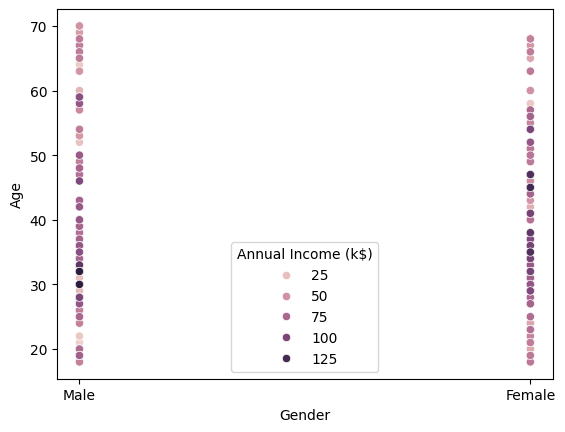

In [23]:
import seaborn as sns
sns.scatterplot(data = Mall_data, x = 'Gender', y = 'Age', hue = 'Annual Income (k$)')

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Mall_data[['Gender', 'Age']], Mall_data[['Annual Income (k$)']], test_size=0.33, random_state=0)

In [31]:
from sklearn import preprocessing

# Assume `X_train` and `X_test` are your dataframes with both numeric and non-numeric columns

# Iterate over columns and encode categorical variables
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = preprocessing.LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

# Now, you can normalize the data
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)


In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(X_train_norm)


KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='Gender', ylabel='Age'>

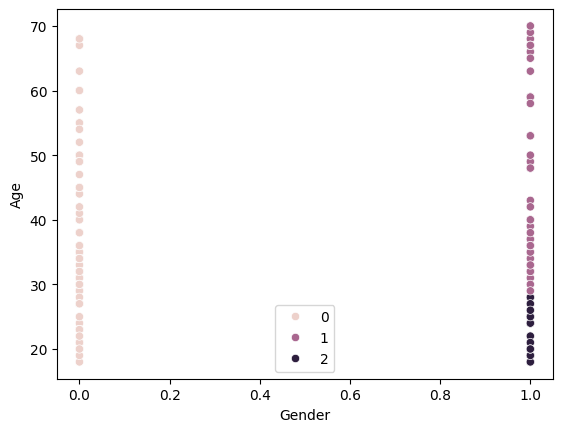

In [34]:
sns.scatterplot(data = X_train, x = 'Gender', y = 'Age', hue = kmeans.labels_)

<Axes: ylabel='Annual Income (k$)'>

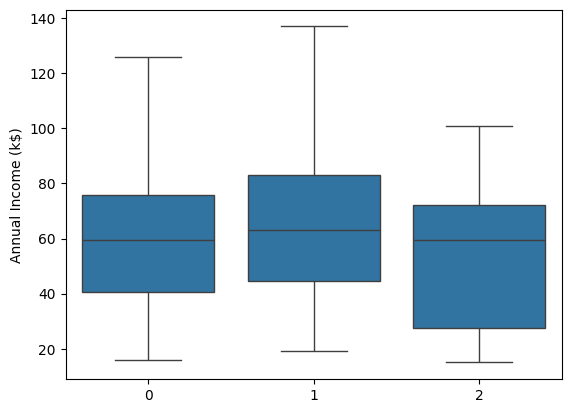

In [36]:
sns.boxplot(x = kmeans.labels_, y = y_train['Annual Income (k$)'])

In [37]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7966213449307441

In [42]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: xlabel='Gender', ylabel='Age'>

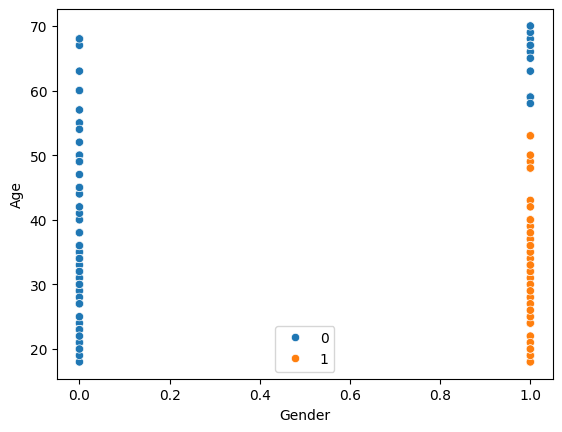

In [43]:
sns.scatterplot(data = X_train, x = 'Gender', y = 'Age', hue = fits[0].labels_)

<Axes: xlabel='Gender', ylabel='Age'>

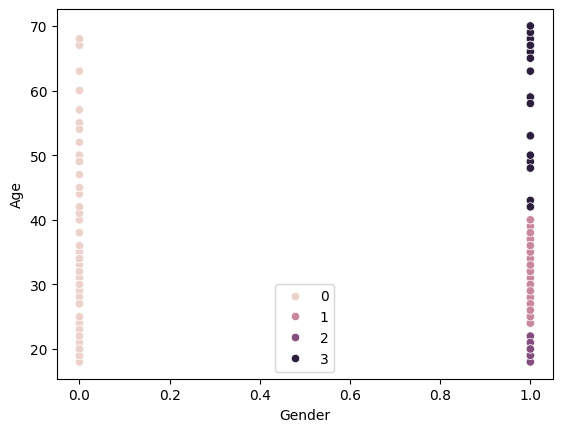

In [44]:
sns.scatterplot(data = X_train, x = 'Gender', y = 'Age', hue = fits[2].labels_)

<Axes: >

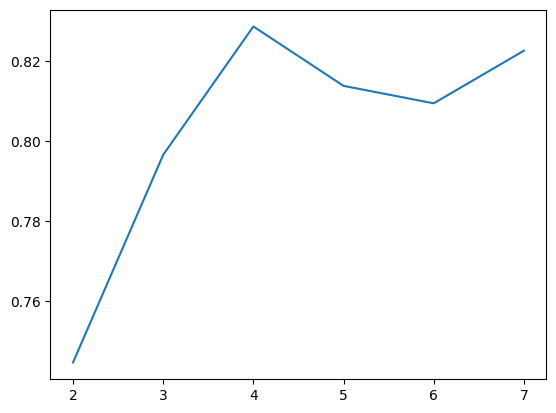

In [45]:
sns.lineplot(x = K, y = score)

<Axes: xlabel='Gender', ylabel='Age'>

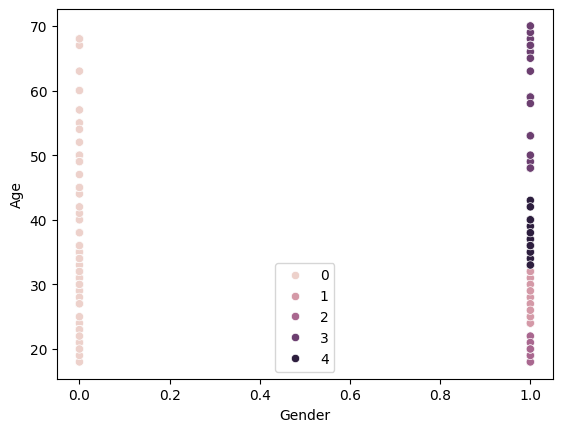

In [47]:
sns.scatterplot(data = X_train, x = 'Gender', y = 'Age', hue = fits[3].labels_)

<Axes: ylabel='Annual Income (k$)'>

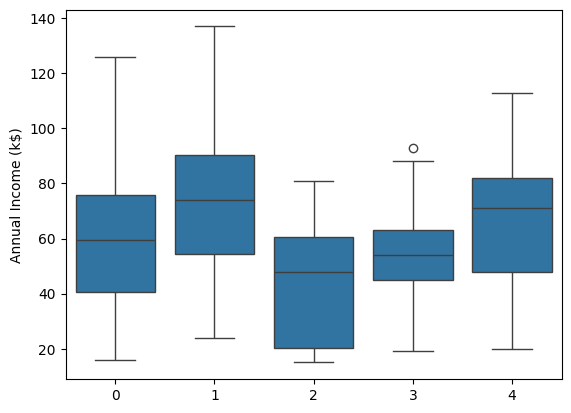

In [48]:
sns.boxplot(x = fits[3].labels_, y = y_train['Annual Income (k$)'])